# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Group Members
- Thao Hoang (A13057853)
- Him Li (A14754959)
- Zhenxuan Zhu (A14897008)
- Rishabh Singhal()
- Jiaxin Ge (A13409166)
- Talal AlQadi (A13816618)


# Research Question

*Fill in your research question here*

## Background and Introduction

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Data Gathering, Wrangling, and Cleaning

Our first step is gathering the data, by taking out the data we require. We initialize a parameters list to adjust filtration based on terms set in the list. We do this to gather all capes submission with cogs using the ClassExtractor function. Which just queries the rows of data out based on the set list, waiting to be transposed by the transpose function.
The next step is to change the dataset, to be more accessible for analysis and to be visually pleasing.

In [133]:
# Setup
import pandas as pd
import numpy as np
import math


# Visualizations
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import seaborn as sns


First, we look at the initial data. However, we realized that each cape_ID question is given its own row, making the data repetetive and clunky.

In [134]:
df_cogs = pd.read_csv('CAPES.csv')
df_cogs.head(10)

,LOCATION,ROOM,QUARTER_INDEX,QUARTER,QUARTER_2,COURSE_ID,COURSE_NUM,SECTION,INSTRUCTOR_LAST,INSTRUCTOR_FIRST,CAPE_ID,QUESTION,SECTION_SIZE,RESPONSE_SIZE,RATING
0,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,5,Instructor displays a proficient command of th...,26,20,4.90
1,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,6,Instructor is well prepared for classes.,26,20,4.75
2,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,7,Instructor's speech is clear and audible.,26,20,4.85
3,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,8,Instructor explains the [coursetype] material ...,26,20,4.70
4,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,9,Lectures hold your attention.,26,20,4.50
5,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,10,Instructor’s lecture style facilitates note-ta...,26,20,4.20
6,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,11,Instructor shows concern for students' learning.,26,20,4.45
7,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,12,Instructor promotes appropriate questions/disc...,26,20,4.15
8,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,13,Instructor is accessible outside of class.,26,20,4.00
9,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,14,Instructor starts and finishes class on time.,26,20,4.55


In [135]:
#Parameter Lists
#Set the variable as None to ignore it when searching
#Change the value here and run all the cells to get an output
LOCATION = None
ROOM = None
QUARTER_INDEX = None          # A number, refer to the file or dataframe
QUARTER = None                # e.g. "FA13"/"WI19"/"SP15"
COURSE_ID = "COGS"             # e.g. "COGS", "BILD"
COURSE_NUM = ["1","3","9","11","14A","14B","17","100"]  # Must be a list of string (double quoted or single quoted)! e.g. ["100", "20A", "120A"]
SECTION = None               # Must be a string! e.g "767325"
INSTRUCTOR_FIRST = None    # instructor's first name
INSTRUCTOR_LAST = None     # instructor's last name
LOWEST_SIZE = None            # Include only sections that have student number >= this variable
LOWEST_RESPONSE = None        # Include only Capes Questions that have number of response >= this variable
CAPES = [5,6,7,8,9,10,17,27,26]        # Must be a list of integer! Include only Capes question with an ID that is in the list. From 5 to 27, plus 51
FILENAME = "COGS_CAPES.csv"    # name of output file

In [136]:
# Read CSV
dtypes = {'LOCATION':str, 'ROOM':str, 'QUARTER_INDEX':int, 'QUATER':int, 'COURSE_ID':str, 'COURSE_NUM':str, 
          'SECTION':str, 'INSTRUCTOR_LAST':str, 'INSTRUCTOR_FIRST': str, 'CAPE_ID':int, 'QUESTION':str, 
          'SECTION_SIZE':int, 'RESPONSE_SIZE':int, "RATING":float}
df = pd.read_csv("CAPES.csv", usecols = ["LOCATION", "ROOM", "QUARTER_INDEX", "QUARTER", 
                                         "COURSE_ID", "COURSE_NUM", "SECTION", "INSTRUCTOR_LAST", 
                                         "INSTRUCTOR_FIRST", "CAPE_ID", "QUESTION", 
                                         "SECTION_SIZE", "RESPONSE_SIZE", "RATING"],
                 dtype = dtypes)

# clean out empty spaces in cells
df["INSTRUCTOR_FIRST"] = df["INSTRUCTOR_FIRST"].str.strip()
df["INSTRUCTOR_LAST"] = df["INSTRUCTOR_LAST"].str.strip()

def ClassExtractor(LOCATION, ROOM, QUARTER, COURSE_ID, COURSE_NUM, SECTION, INSTRUCTOR_LAST, 
                   INSTRUCTOR_FIRST, LOWEST_SIZE, LOWEST_RESPONSE, CAPES):
    result = df
    
    if LOCATION is not None:
        result = result[result["LOCATION"] == LOCATION]
    
    if ROOM is not None:
        reulst = result[result["ROOM"] == ROOM]
        
    if QUARTER is not None:
        result = result[result["QUATER"] == QUARTER]
    
    if COURSE_ID is not None:
        result = result[result["COURSE_ID"] == COURSE_ID]
        
    if COURSE_NUM is not None:
        result = result[result["COURSE_NUM"].isin(COURSE_NUM)]
        
    if SECTION is not None:
        result = result[result["SECTION"] == SECTION]
    
    if INSTRUCTOR_LAST is not None:
        result = result[result["INSTRUCTOR_LAST"] == INSTRUCTOR_LAST]
        
    if INSTRUCTOR_FIRST is not None:
        result = result[result["INSTRUCTOR_FIRST"] == INSTRUCTOR_FIRST]
        
    if LOWEST_SIZE is not None:
        result = result[result["SECTION_SIZE"] >= LOWEST_SIZE]
        
    if LOWEST_RESPONSE is not None:
        result = result[result["RESPONSE_SIZE"] >= LOWEST_RESPONSE]
        
    if isinstance(CAPES, list):
        result = result[result["CAPE_ID"].isin(CAPES)]
    
    
    return result

def AlltimeAvg(INSTRUCTOR_FIRST, INSTRUCTOR_LAST, CAPES):
    newdf = (df.loc[df["INSTRUCTOR_LAST"] == INSTRUCTOR_LAST]).loc[df["INSTRUCTOR_FIRST"] == INSTRUCTOR_FIRST]
    dic = {}

    for i in CAPES:
        temp = newdf.loc[newdf["CAPE_ID"] == i]
        dic[i] = temp["RATING"].mean()

    print("All Time Average Rating for", INSTRUCTOR_LAST + ",", INSTRUCTOR_FIRST, "in (CAPE_ID, AVG)")
    for key, value in dic.items():
        print(key, value)


After extracting the data we require, we now must convert the dataset into a nicely formatted dataframe with with each section having its own average ratings. The initial dataset contains about 21 rows per CAPES submission, but after some filtration, we leveled it down to 9 questions that we are interested in through the parameters list. Still, this means 9 rows for each Capes submission. With the following functions, each rating is converted into a column. Furthermore, each CAPES_ID question is renamed in reference to what the question is asking.

In [137]:
# This cell essentially transposes the ratings into column values
# to get rid of duplicate values
aggregations = {
    'RATING':'mean',
    'SECTION_SIZE':'sum',
    'RESPONSE_SIZE':'sum'
}
def transpose(output):
    hall = output
    data = hall.groupby(['CAPE_ID','SECTION']).agg(aggregations).reset_index()

    know_rating = pd.Series(data[data.CAPE_ID == 5].RATING)
    prep_rating = pd.Series(data[data.CAPE_ID == 6].RATING)
    audible_rating = pd.Series(data[data.CAPE_ID == 7].RATING)
    expl_rating = pd.Series(data[data.CAPE_ID == 8].RATING)
    attent_rating = pd.Series(data[data.CAPE_ID == 9].RATING)
    note_rating = pd.Series(data[data.CAPE_ID == 10].RATING)
    stimu_rating = pd.Series(data[data.CAPE_ID == 17].RATING)
    rec_course_rating = pd.Series(data[data.CAPE_ID == 26].RATING)
    rec_professor_rating = pd.Series(data[data.CAPE_ID == 27].RATING)
    df = hall
    df = df.drop_duplicates(subset=['SECTION'], keep='first')

    df.loc[:,'know_rating'] = list(know_rating.values)
    df.loc[:,'prep_rating'] = prep_rating.values
    df.loc[:,'audible_rating'] = audible_rating.values
    df.loc[:,'expl_rating'] = expl_rating.values
    df.loc[:,'attent_rating'] = attent_rating.values
    df.loc[:,'note_rating'] = note_rating.values
    df.loc[:,'stimu_rating'] = stimu_rating.values
    df.loc[:,'rec_course_rating'] = rec_course_rating.values
    df.loc[:,'rec_professor_rating'] = rec_professor_rating.values
    df = df.drop(columns=['QUESTION','CAPE_ID'])

    
    return df

In [138]:
# Calling Function and Write Data
original = ClassExtractor(LOCATION, ROOM, QUARTER, COURSE_ID, COURSE_NUM, SECTION, INSTRUCTOR_LAST, 
                   INSTRUCTOR_FIRST, LOWEST_SIZE, LOWEST_RESPONSE, CAPES)
output = transpose(original)
filename = FILENAME or "CAPE_" + (INSTRUCTOR_FIRST or "" or COURSE_ID) + " " + (INSTRUCTOR_LAST or "") + ".csv"
filename = "DATA/" + filename

if not output.empty:
    output.to_csv(filename)


In [139]:
df_cogs = pd.read_csv("COGS_CAPES.csv")
df_cogs.head(5)

,Unnamed: 0,LOCATION,ROOM,QUARTER_INDEX,QUARTER,COURSE_ID,COURSE_NUM,SECTION,INSTRUCTOR_LAST,INSTRUCTOR_FIRST,...,RATING,know_rating,prep_rating,audible_rating,expl_rating,attent_rating,note_rating,stimu_rating,rec_course_rating,rec_professor_rating
0,6005,PETER,110,9,FA12,COGS,1,751912,Creel,Sarah,...,4.263158,4.391111,4.277778,4.496296,3.889630,3.715556,3.719259,3.838519,0.829630,0.869630
1,6530,CENTR,115,9,FA12,COGS,11,751622,Boyle,Mary E. T.,...,4.741935,4.714574,4.719534,4.571525,4.392761,4.282002,3.491519,4.624776,0.921627,0.937500
2,6684,SOLIS,104,9,FA12,COGS,17,751631,Johnson,Christine M.,...,4.682927,4.647019,4.542683,4.490515,4.466125,3.803523,3.907353,4.504065,0.923442,0.920054
3,6747,CENTR,115,9,FA12,COGS,3,751615,Boyle,Mary E. T.,...,4.333333,4.151964,4.143793,4.293289,4.156604,3.785060,3.964009,4.294407,0.892550,0.943732
4,40567,PCYNH,121,11,FA13,COGS,1,783453,Boyle,Mary E. T.,...,4.250000,3.956792,3.952378,3.976577,3.720754,3.494954,3.653218,4.007390,0.835799,0.884138


Perfect! Now we have the dataset in order, with each capes submission on its own row. Furthermore ratings values are set, but still need more cleaning. For the cleaning, we will drop NA values, and the unnamed column. Furthermore, we are setting the rating column to be the average of all the other ratings. 

In [140]:
#Setting the dataframe, and cleaning it up
df_cogs = df_cogs.dropna()
df_cogs = df_cogs.drop(columns='Unnamed: 0')
df_cogs.RATING = df_cogs[['know_rating','prep_rating','audible_rating',
                          'expl_rating','attent_rating','note_rating',
                          'stimu_rating']].mean(axis=1)

# Data Analysis & Visualization

We start out by first looking at the data and what it has to offer

First, we start by looking at the classrooms involved in the dataset. We see that there are a lot of entries for CSB, PCYNH, CENTR, and very little for CICC and Sequo. Meaning, that data may be skewed for those locations.

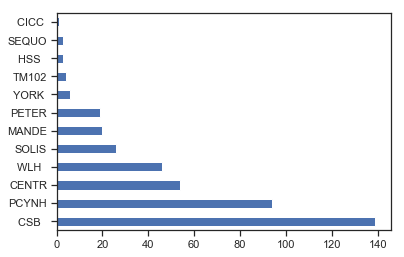

In [141]:
# Counts for each classroom
counts = df_cogs['LOCATION'].value_counts()
counts.plot(kind='barh')

f1 = plt.gcf()

As in the plot above, we only have a very small amount of data related to CICC, SEQUO, HSS and TM102. This is not enough for us to reach a conclusion about the relation between these locations and CAPES rating score, so we will drop locations with less than 10 occurrences.

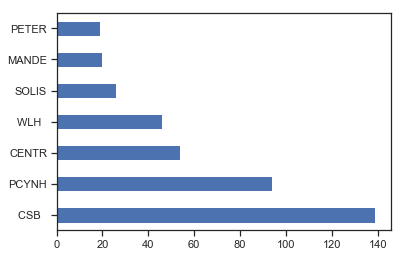

In [142]:
df_cogs = df_cogs[df_cogs['LOCATION'].isin(counts[counts>=10].index)]
counts = df_cogs['LOCATION'].value_counts()
counts.plot(kind='barh')

f1 = plt.gcf()

Now that we know which locations are most used in the cog sci department for the chosen classes, we can move on to see the correlations of the variables in comparison to each other.
From the heatmap below, we can see that the correlations are reasonable. For example, recommendation of professor rating is most positvely correlated with the explanation rating. Preparation rating is most correlated with explanation rating too, and knowledge rating. Audible rating isn't extremely correlated with other ratings, suggesting it may be primarly effected by the classroom itself.

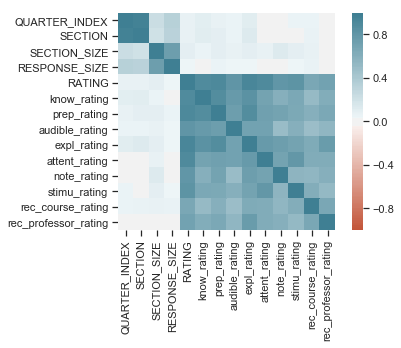

In [143]:
## YOUR CODE HERE
sns.set(style="ticks")
corr = df_cogs.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

To continue our exploration of the ratings, we want to see if there is a link between location and ratings.  We setup a for loop to calculate the all the average ratings for each location, and save the entries in their respective variables.

In [144]:
classes = df_cogs.LOCATION.unique()
average_ratings = np.zeros(len(classes))
note_ratings = np.zeros(len(classes))
prep_ratings = np.zeros(len(classes))
audible_ratings = np.zeros(len(classes))
expl_ratings = np.zeros(len(classes))
rec_professor_ratings = np.zeros(len(classes))
rec_course_ratings = np.zeros(len(classes))
stimu_ratings = np.zeros(len(classes))
note_ratings = np.zeros(len(classes))
for i in range(len(classes)):
    average_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].RATING.mean()
    note_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].note_rating.mean()
    prep_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].prep_rating.mean()
    audible_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].audible_rating.mean()
    expl_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].expl_rating.mean()
    rec_professor_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].rec_professor_rating.mean()
    rec_course_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].rec_course_rating.mean()
    stimu_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].stimu_rating.mean()
    if np.isnan(average_ratings[i]) :
        average_ratings = average_ratings[:i]
        note_ratings = note_ratings[:i]
        prep_ratings = prep_ratings[:i]
        audible_ratings = audible_ratings[:i]
        expl_ratings = expl_ratings[:i]
        rec_professor_ratings = rec_professor_ratings[:i]
        rec_course_ratings = rec_course_rating[:i]
        stimu_ratings = stimu_rating[:i]
        classes[i]

In [145]:
COLOR_MAP = {0 : '#461969ff',
            1 : '#45337dff',
            2 : '#3c4f8aff',
            3 : '#33638dff',
            4 : '#29788eff',
            5 : '#25a186ff',
            6 : '#35b479ff',
            7 : '#5cc863ff',
            8 : '#c3df2eff',
            9 : '#fde725ff',
            10 : '#45B39D',
            11 : '#9B59B6',
            12 : '#A9DFBF',
            13 : '#D4AC0D'
           }

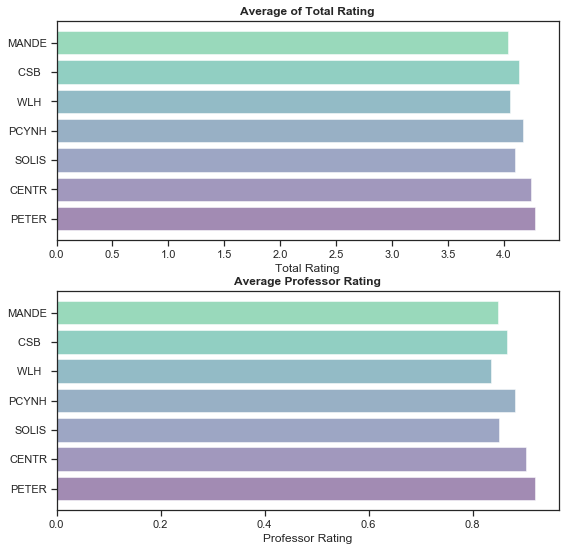

In [146]:
color1 = [COLOR_MAP[l] for l in range(len(classes))]

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(9,9))
fig.subplots_adjust(hspace = 0.23, wspace=0.70)
# Average Total Rating of each Location
ax[0].barh(classes, average_ratings, alpha=0.5, color=color1)
ax[0].set_xlabel('Total Rating')
ax[0].set_title('Average of Total Rating',fontweight='bold')
# Average Professor Rating of each Location
ax[1].barh(classes, rec_professor_ratings, alpha=0.5, color=color1)
ax[1].set_xlabel('Professor Rating')
ax[1].set_title('Average Professor Rating',fontweight='bold')

plt.show()

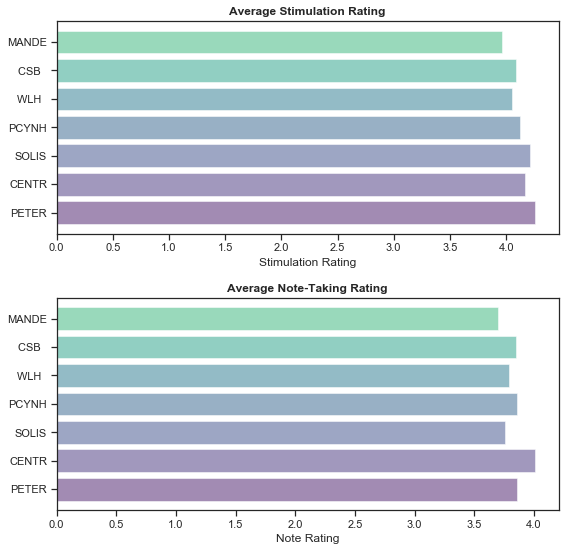

In [147]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(9,9))
fig.subplots_adjust(hspace = 0.3, wspace=0.70)
# Average Stimulation Rating
ax[0].barh(classes, stimu_ratings, alpha=0.5, color=color1)
ax[0].set_xlabel('Stimulation Rating')
ax[0].set_title('Average Stimulation Rating',fontweight='bold')
# Average Note Ratings of each Location
ax[1].barh(classes, note_ratings, alpha=0.5, color=color1)
ax[1].set_xlabel('Note Rating')
ax[1].set_title('Average Note-Taking Rating',fontweight='bold')
plt.show()

From the visualizations above, we can see the 4 different average ratings for each location. Among all locations, lectures held at CENTR and PETER receive comparatively higher average CAPES rating. On the other hand, MANDE and WLH have relatively low rating for almost all four categories. 
All around, the note-taking rating is low for all the locations, with exceptions to Center hall. CSB fairs the highest note-taking rating, but Peterson has a higher average total rating. On the other hand, Peterson has a very low note rating, could be due to the limited projectors and age of the rooms. 

Yet we cannot make any definitive conclusion about the superority of PERTR and CENTR nor the inferiority of WLH and MANDE. While we've selected certain courses from the same department to make sure they're about the same level of difficulty, still there can be some confounding variable such as the possibility that most of COGS students don't like CSE, causing a lower rating for it. Therefore, we will continue on looking into classes from other department to see which classroom is "magic" accross all departments.

We repeat the same process for classes from CSE department (we chose CSE 8B, 8A, 30, 11 to ensure courses are of similar difficulty):

In [148]:
df_vis = pd.read_csv("CSE_CAPES.csv")
df_vis.head(5)

,Unnamed: 0,LOCATION,ROOM,QUARTER_INDEX,QUARTER,COURSE_ID,COURSE_NUM,SECTION,INSTRUCTOR_LAST,INSTRUCTOR_FIRST,...,RATING,know_rating,prep_rating,audible_rating,expl_rating,attent_rating,note_rating,stimu_rating,rec_course_rating,rec_professor_rating
0,7815,NaN,NaN,9,FA12,CSE,11,755925,Ord,Richard,...,4.814815,4.301471,4.207407,4.169118,4.007353,3.305970,3.185185,4.096296,0.970588,0.904412
1,8523,PCYNH,109,9,FA12,CSE,30,755935,Ord,Richard,...,4.855670,4.686957,4.706897,4.784483,4.637931,4.336207,3.695652,4.330435,0.939655,0.991379
2,8640,PCYNH,109,9,FA12,CSE,8A,755909,Gillespie,Gary N,...,4.301471,4.814815,4.785047,4.822430,4.588785,3.953271,4.443396,4.398148,0.963964,0.936937
3,8661,PCYNH,109,9,FA12,CSE,8A,755913,Alvarado,Christine J.,...,4.686957,4.855670,4.824742,4.845361,4.721649,4.391753,4.762887,4.656250,0.938144,0.979381
4,8682,PCYNH,109,9,FA12,CSE,8A,762476,Lee,Cynthia Bailey,...,4.413793,4.413793,4.465517,4.508621,4.301724,3.829060,3.234783,4.258621,0.974576,0.940678


In [149]:
#Setting the dataframe, and cleaning it up
df_vis = df_vis.dropna()
df_vis = df_vis.drop(columns='Unnamed: 0')
df_vis.RATING = df_vis[['know_rating','prep_rating','audible_rating',
                          'expl_rating','attent_rating','note_rating',
                          'stimu_rating']].mean(axis=1)

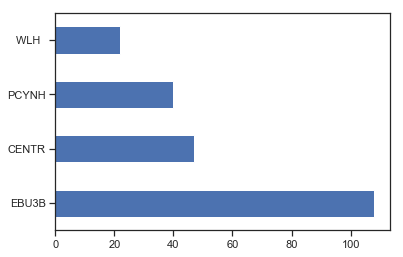

In [150]:
counts = df_vis['LOCATION'].value_counts()
df_vis = df_vis[df_vis['LOCATION'].isin(counts[counts>=10].index)]
counts = df_vis['LOCATION'].value_counts()
counts.plot(kind='barh')

f1 = plt.gcf()

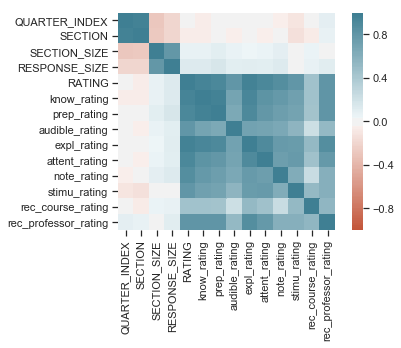

In [151]:
## YOUR CODE HERE
sns.set(style="ticks")
corr = df_vis.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

To continue our exploration of the ratings, we want to see if there is a link between location and ratings.  We setup a for loop to calculate the all the average ratings for each location, and save the entries in their respective variables.

In [152]:
classes = df_vis.LOCATION.unique()
average_ratings = np.zeros(len(classes))
note_ratings = np.zeros(len(classes))
prep_ratings = np.zeros(len(classes))
audible_ratings = np.zeros(len(classes))
expl_ratings = np.zeros(len(classes))
rec_professor_ratings = np.zeros(len(classes))
rec_course_ratings = np.zeros(len(classes))
stimu_ratings = np.zeros(len(classes))
note_ratings = np.zeros(len(classes))
for i in range(len(classes)):
    average_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].RATING.mean()
    note_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].note_rating.mean()
    prep_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].prep_rating.mean()
    audible_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].audible_rating.mean()
    expl_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].expl_rating.mean()
    rec_professor_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].rec_professor_rating.mean()
    rec_course_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].rec_course_rating.mean()
    stimu_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].stimu_rating.mean()
    if np.isnan(average_ratings[i]) :
        average_ratings = average_ratings[:i]
        note_ratings = note_ratings[:i]
        prep_ratings = prep_ratings[:i]
        audible_ratings = audible_ratings[:i]
        expl_ratings = expl_ratings[:i]
        rec_professor_ratings = rec_professor_ratings[:i]
        rec_course_ratings = rec_course_rating[:i]
        stimu_ratings = stimu_rating[:i]
        classes[i]

In [153]:
COLOR_MAP = {0 : '#461969ff',
            1 : '#45337dff',
            2 : '#3c4f8aff',
            3 : '#33638dff',
            4 : '#29788eff',
            5 : '#25a186ff',
            6 : '#35b479ff',
            7 : '#5cc863ff',
            8 : '#c3df2eff',
            9 : '#fde725ff',
            10 : '#45B39D',
            11 : '#9B59B6',
            12 : '#A9DFBF',
            13 : '#D4AC0D'
           }

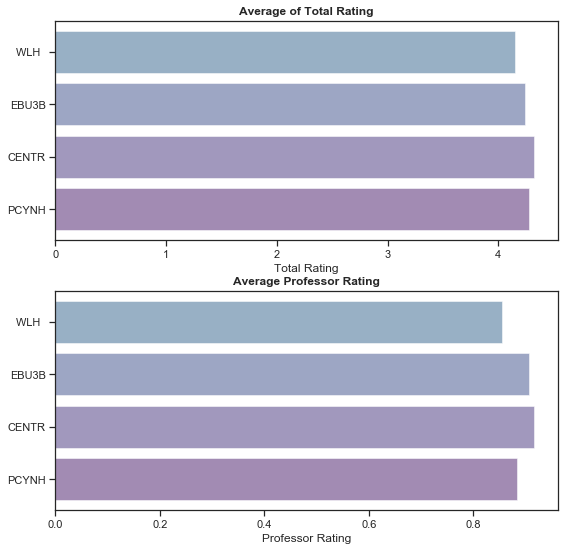

In [154]:
color1 = [COLOR_MAP[l] for l in range(len(classes))]

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(9,9))
fig.subplots_adjust(hspace = 0.23, wspace=0.70)
# Average Total Rating of each Location
ax[0].barh(classes, average_ratings, alpha=0.5, color=color1)
ax[0].set_xlabel('Total Rating')
ax[0].set_title('Average of Total Rating',fontweight='bold')
# Average Professor Rating of each Location
ax[1].barh(classes, rec_professor_ratings, alpha=0.5, color=color1)
ax[1].set_xlabel('Professor Rating')
ax[1].set_title('Average Professor Rating',fontweight='bold')

plt.show()

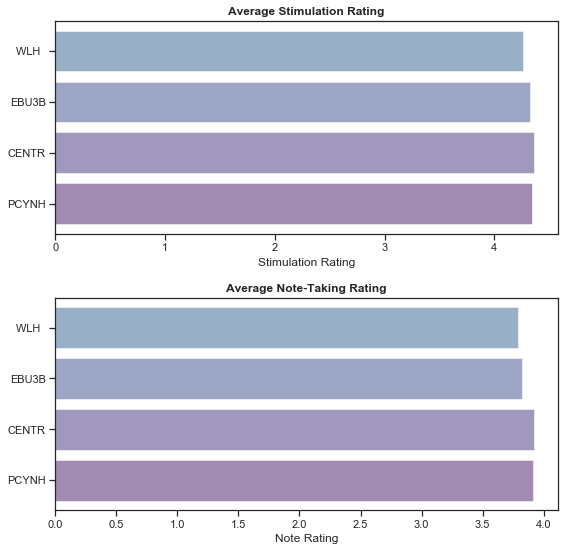

In [155]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(9,9))
fig.subplots_adjust(hspace = 0.3, wspace=0.70)
# Average Stimulation Rating
ax[0].barh(classes, stimu_ratings, alpha=0.5, color=color1)
ax[0].set_xlabel('Stimulation Rating')
ax[0].set_title('Average Stimulation Rating',fontweight='bold')
# Average Note Ratings of each Location
ax[1].barh(classes, note_ratings, alpha=0.5, color=color1)
ax[1].set_xlabel('Note Rating')
ax[1].set_title('Average Note-Taking Rating',fontweight='bold')
plt.show()

We see that WLH is the least popular location among CSE students, while CENTR is a pretty popular one. The result somewhat coincides with the previous one from COGS department. Let's set our eyes on CENTR and WLH for the moment.

First we are going to extract the rating for all lectures held at CENTR or WLH.

In [156]:
#temporarily place here for reference
    know_rating = pd.Series(data[data.CAPE_ID == 5].RATING)
    prep_rating = pd.Series(data[data.CAPE_ID == 6].RATING)
    audible_rating = pd.Series(data[data.CAPE_ID == 7].RATING)
    expl_rating = pd.Series(data[data.CAPE_ID == 8].RATING)
    attent_rating = pd.Series(data[data.CAPE_ID == 9].RATING)
    note_rating = pd.Series(data[data.CAPE_ID == 10].RATING)
    stimu_rating = pd.Series(data[data.CAPE_ID == 17].RATING)
    rec_course_rating = pd.Series(data[data.CAPE_ID == 26].RATING)
    rec_professor_rating = pd.Series(data[data.CAPE_ID == 27].RATING)

IndentationError: unexpected indent (<ipython-input-156-72eceb94d68a>, line 2)

In [157]:
df_all = pd.read_csv('CAPES.csv')

df_ctr = df_all.loc[df_all['LOCATION'] == 'CENTR']
df_wlh = df_all.loc[df_all['LOCATION'].str.strip() == 'WLH']

ctr_know_rating = df_ctr.loc[df_ctr['CAPE_ID'] == 5, 'RATING']
wlh_know_rating = df_wlh.loc[df_wlh['CAPE_ID'] == 5, 'RATING']




In [158]:
ctr_know_rating.describe()

count    7196.000000
mean        4.466018
std         0.356681
min         1.833333
25%         4.285714
50%         4.530793
75%         4.714286
max         5.000000
Name: RATING, dtype: float64

In [159]:
wlh_know_rating.describe()

count    6501.000000
mean        4.461395
std         0.375054
min         2.136364
25%         4.277778
50%         4.533333
75%         4.727273
max         5.000000
Name: RATING, dtype: float64

For rating on Professor's master of course knowledge, we didn't witness much difference between two location, expectedly, as this is not a factor that should be affected by the classroom. But still we need to do an overall comparison between CENTR and WLH to determine whether CENTR really has certain advantages over WLH.

In [160]:
ctr_note_rating = df_ctr.loc[df_ctr['CAPE_ID'] == 10, 'RATING']
wlh_note_rating = df_wlh.loc[df_wlh['CAPE_ID'] == 10, 'RATING']

In [161]:
ctr_note_rating.describe()

count    7166.000000
mean        3.914406
std         0.543694
min         1.000000
25%         3.583333
50%         4.000000
75%         4.318182
max         5.000000
Name: RATING, dtype: float64

In [162]:
wlh_note_rating.describe()

count    6475.000000
mean        4.039244
std         0.533162
min         1.571429
25%         3.739130
50%         4.111111
75%         4.428571
max         5.000000
Name: RATING, dtype: float64

With prep and knowledge rating not showing much difference between the two halls, the note taking rating on the other hand does. Warren has a higher mean, lower std deviation, higher minimum, and better note taking stats all around. Wondering what this is, we will import a classroom attributes dataset to go over the differences between the buildings.

In [163]:
room = pd.read_csv("ClassroomAttributes.csv")

def change(acoustic):
    if acoustic[1:5] == ' - P':
        acoustic = 'Poor'
    if acoustic[1:5] == ' - F':
        acoustic = 'Fair'
    if acoustic[1:5] == ' - G':
        acoustic = 'Good'
    return acoustic

room.Acoustics = room.Acoustics.apply(change)

In [164]:
room[room['Building Name'] == "Center Hall"].Acoustics.describe()

count       26
unique       3
top       Poor
freq        21
Name: Acoustics, dtype: object

In [165]:
room[room['Building Name'] == "Warren Lecture Hall"].Acoustics.describe()

count       14
unique       2
top       Good
freq        10
Name: Acoustics, dtype: object

In [166]:
ctr_audi_rating = df_ctr.loc[df_ctr['CAPE_ID'] == 7, 'RATING']
wlh_audi_rating = df_wlh.loc[df_wlh['CAPE_ID'] == 7, 'RATING']
print("Center Hall Auditory Rating:", ctr_audi_rating.mean())
print("Warren Lecture Hall Auditory Rating:", wlh_audi_rating.mean())


Center Hall Auditory Rating: 4.33417692274747
Warren Lecture Hall Auditory Rating: 4.286381370386814


We can instantly see a quick difference! Warren Lecture Hall has a total of 14 different classrooms, 10 with Good Acoustics, while Center Hall has a total of 26 classes, with 21 of them having Poor acoustics. This could be the reason the note taking rating is lower in center hall. However, the Center Hall auditory rating still seems to be a bit higher than WLH's rating.

Text(0.5, 1.0, 'Center Hall')

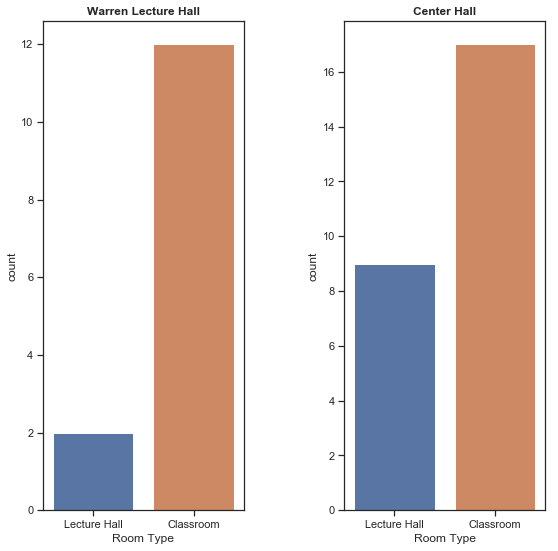

In [167]:
wlh_room = room[room['Building Name'] == "Warren Lecture Hall"]['Room Type']
ctr_room = room[room['Building Name'] == "Center Hall"]['Room Type']

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(9,9))
fig.subplots_adjust(hspace = 0.33, wspace=0.50)

sns.countplot(wlh_room, ax=ax[0])
ax[0].set_title('Warren Lecture Hall',fontweight='bold')
sns.countplot(ctr_room, ax=ax[1])
ax[1].set_title('Center Hall',fontweight='bold')

The room type plots show a higher ratio of classrooms in warren lecture hall, meaning a smaller class size, and a more closer view to both the professor and the board. This along with the higher acoustics rating leads us to believe that is why the note taking rating is higher, also keeping in mind that the knowledge rating is equivalent in both buildings.

Furthermore, we continue exploring other discrepencies between the buildings

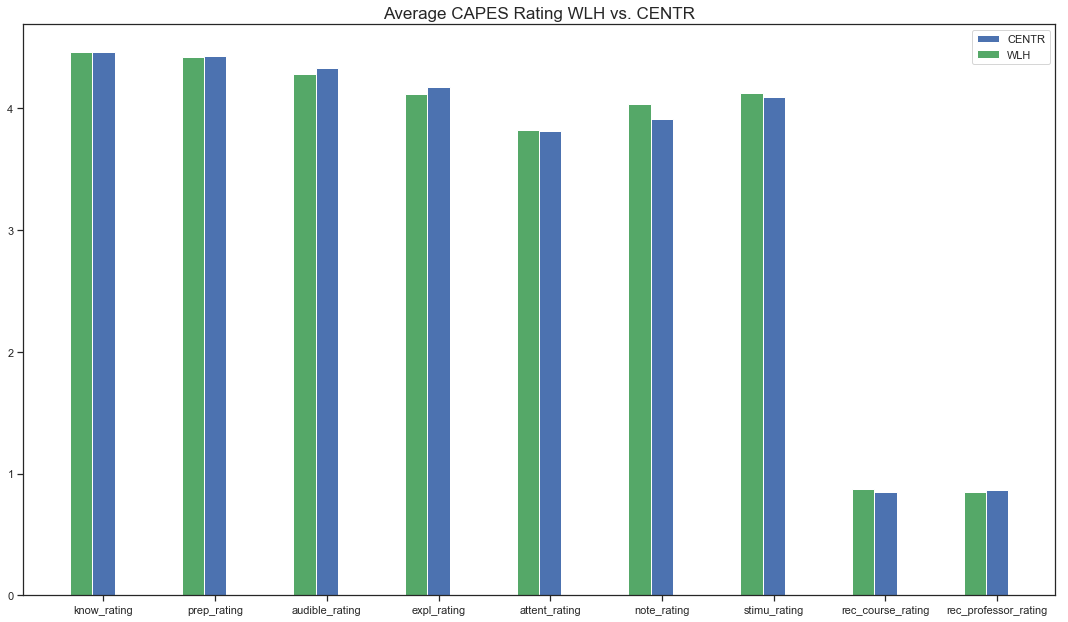

In [168]:
ID_LIST = [5,6,7,8,9,10,17,26,27]
STR_LIST = ['know_rating', 'prep_rating', 'audible_rating', 'expl_rating', 'attent_rating', 'note_rating', 'stimu_rating', 
            'rec_course_rating', 'rec_professor_rating']
dic_ctr = {}
dic_wlh = {}

for i in range(0, len(ID_LIST)):
    dic_ctr[STR_LIST[i]] = df_ctr.loc[df_ctr['CAPE_ID'] == ID_LIST[i], 'RATING'].mean()
    dic_wlh[STR_LIST[i]] = df_wlh.loc[df_wlh['CAPE_ID'] == ID_LIST[i], 'RATING'].mean()

ind = np.arange(len(dic_ctr))
ax = plt.subplot(111)
ax.bar(ind, dic_ctr.values(), width=0.2, color='b', align='center')
ax.bar(ind-0.2, dic_wlh.values(), width=0.2, color='g', align='center')
ax.legend(('CENTR', 'WLH'))
plt.xticks(ind, STR_LIST)
plt.title('Average CAPES Rating WLH vs. CENTR', fontsize=17)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

While generally there isn't a huge difference between the CAPES rating of WLH and CENTR, the average CAPES rating on audibility and professor's explanation for CENTR is a bit higher than that for WLH. We can furthur dig into that to see whether there's a significant difference between two places for this specific CAPES rating.

In other words, we want to perform a paired t test on the average rating for CENTR and WLH.

In [169]:
ctr_audible_rating = df_ctr.loc[df_ctr['CAPE_ID'] == 7, 'RATING']
wlh_audible_rating = df_wlh.loc[df_wlh['CAPE_ID'] == 7, 'RATING']
ctr_expl_rating = df_ctr.loc[df_ctr['CAPE_ID'] == 8, 'RATING']
wlh_expl_rating = df_wlh.loc[df_wlh['CAPE_ID'] == 8, 'RATING']

First we want to check whether there are significant outlier in each variable.

[Text(0, 0, 'ctr_audible'),
 Text(0, 0, 'wlh_audible'),
 Text(0, 0, 'ctr_expl'),
 Text(0, 0, 'wlh_expl')]

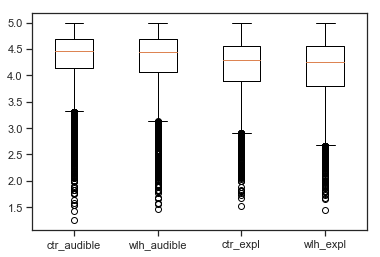

In [170]:
fig, ax = plt.subplots()
ax.boxplot([ctr_audible_rating, wlh_audible_rating, ctr_expl_rating, wlh_expl_rating])
ax.set_xticklabels(['ctr_audible', 'wlh_audible', 'ctr_expl', 'wlh_expl'])

From the boxplot we see that the distribution of all four CAPES rating are severely skewed to the left with abundance of outliers, which is not good and could lead to bias. It's very likely that the outliers are due to certain professors with unsatisfiable articulability that significantly lowers the average rating. Thus we will want to find a single professor who does not tend to have very low rating on these two subjects and frequently presents lecture in CENTR and WLH.

In [171]:
d1 = df_ctr['INSTRUCTOR_FIRST'].value_counts()
d2 = df_wlh['INSTRUCTOR_FIRST'].value_counts()

def findFirstCommon(d1, d2):
    d1_keys = d1.keys().tolist()
    d1_counts = d1.tolist()
    d2_keys = d2.keys().tolist()
    d2_counts = d2.tolist()
    
    MAX = 0
    maxKeys = ''
    maxIndex = (0, 0)
    for i in range(0, len(d1_keys)):
        if (d1_keys[i] in d2_keys):
            i2 = d2_keys.index(d1_keys[i])
            # To ensure the instructor presents lecture frequently at 'both' places
            if (d1_counts[i] > 100 and d2_counts[i2] > 100):
                s = d1_counts[i]+d2_counts[i2]
                if s > MAX:
                    MAX = s
                    if d1_keys[i] != ' Michael':
                        maxKeys = d1_keys[i]
                        maxIndex = (i, i2)
    
    print(d1_counts[maxIndex[0]], d2_counts[maxIndex[1]])
    print(maxKeys)
    return maxKeys

findFirstCommon(d1, d2)

470 1989
 Adam R.


' Adam R.'

Using the function above, we find out that the Professor who most frequenlty presents lecture at CENTER and WLH is Bowers, Adam R who is a MATH Professor. He will become our focus of study.

[Text(0, 0, 'ctr_audible'),
 Text(0, 0, 'wlh_audible'),
 Text(0, 0, 'ctr_expl'),
 Text(0, 0, 'wlh_expl')]

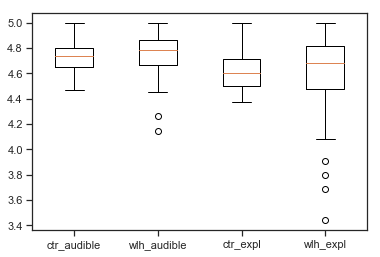

In [172]:
# Extrac the data again
ctr_audible_rating = df_ctr.loc[(df_ctr['INSTRUCTOR_FIRST'].str.strip() == 'Adam R.') & (df_ctr['CAPE_ID'] == 7), 'RATING']
wlh_audible_rating = df_wlh.loc[(df_wlh['INSTRUCTOR_FIRST'].str.strip() == 'Adam R.') & (df_wlh['CAPE_ID'] == 7), 'RATING']
ctr_expl_rating = df_ctr.loc[(df_ctr['INSTRUCTOR_FIRST'].str.strip() == 'Adam R.') & (df_ctr['CAPE_ID'] == 8), 'RATING']
wlh_expl_rating = df_wlh.loc[(df_wlh['INSTRUCTOR_FIRST'].str.strip() == 'Adam R.') & (df_wlh['CAPE_ID'] == 8), 'RATING']

fig, ax = plt.subplots()
ax.boxplot([ctr_audible_rating, wlh_audible_rating, ctr_expl_rating, wlh_expl_rating])
ax.set_xticklabels(['ctr_audible', 'wlh_audible', 'ctr_expl', 'wlh_expl'])

In [173]:
print(stats.normaltest(ctr_audible_rating), '\n', stats.normaltest(wlh_audible_rating),
      '\n', stats.normaltest(ctr_expl_rating), '\n', stats.normaltest(wlh_expl_rating))
print(len(ctr_audible_rating), len(wlh_audible_rating))

NormaltestResult(statistic=0.08264118226404442, pvalue=0.959521466560193) 
 NormaltestResult(statistic=23.547835806302835, pvalue=7.70286744361849e-06) 
 NormaltestResult(statistic=1.3901832812032966, pvalue=0.4990287145980049) 
 NormaltestResult(statistic=39.18257864677787, pvalue=3.10178115790718e-09)
33 93


As seen in the boxplot and the normaltest above, we manage to reduce many of the outliers and select a sample that is more centralized. The size of the observation are 33 and 93 respectively, by Central Limit Theorem, we can perform a paired t test to find out the difference in sample means.

In [174]:
print(stats.ttest_ind(ctr_audible_rating, wlh_audible_rating), '\n', stats.ttest_ind(ctr_expl_rating, wlh_expl_rating))

Ttest_indResult(statistic=-1.561327972361426, pvalue=0.1209949956465099) 
 Ttest_indResult(statistic=0.06248359641752124, pvalue=0.9502783309097182)


P-values on both tests are greater than our the significance level of '0.05', indicating that there're no significant mean difference between the samples. We fail to conclude that presenting lectures at WLH or CENTR will affect the CAPES rating on audibility or explanation clarity

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*